# This is the beginning of the DataHacks ScienceGang Project

---

## Part1: General Setup and Imports

In [43]:
# general imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
#import folium
#from folium import plugins

# These lines set up graphing capabilities.
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 15)

%matplotlib inline

In [2]:
# read .csv file into a DataFrame
loc = 'U.S._Chronic_Disease_Indicators__CDI_.csv'
Chronic_Diseases = pd.read_csv(loc)
Chronic_Diseases

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_2,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,11,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,66,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,72,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
5,2012,2012,VI,Virgin Islands,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,78,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
6,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,66,ALC,ALC8_0_2,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519711,2014,2014,TN,Tennessee,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,"cases per 10,000",Crude Rate,...,47,AST,AST3_1,CRDRATE,GENDER,GENF,NaN,NaN,NaN,NaN
519712,2016,2016,DC,District of Columbia,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,NaN,%,Age-adjusted Prevalence,...,11,CVD,CVD10_1,AGEADJPREV,GENDER,GENF,NaN,NaN,NaN,NaN


In [3]:
# browse data structure and contents
print(Chronic_Diseases.shape)
print(Chronic_Diseases.describe())

(519718, 34)
           YearStart        YearEnd  DataValueAlt  LowConfidenceLimit  \
count  519718.000000  519718.000000  3.503350e+05       311062.000000   
mean     2013.141885    2013.162754  8.917742e+02           46.759401   
std         1.777622       1.762672  1.833073e+04           77.492628   
min      2001.000000    2001.000000  0.000000e+00            0.200000   
25%      2012.000000    2012.000000  1.845500e+01           12.700000   
50%      2013.000000    2013.000000  4.100000e+01           30.200000   
75%      2015.000000    2015.000000  7.030000e+01           55.400000   
max      2016.000000    2016.000000  2.600878e+06         1330.660000   

       HighConfidenceLimit     LocationID  
count        311062.000000  519718.000000  
mean             58.991287      30.993144  
std              88.668862      17.723341  
min               0.420000       1.000000  
25%              18.900000      17.000000  
50%              43.800000      30.000000  
75%              70.4

In [4]:
Chronic_Diseases.isna().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
                              ...  
DataValueTypeID                   0
StratificationCategoryID1         0
StratificationID1                 0
StratificationCategoryID2    440529
StratificationID2            440529
StratificationCategoryID3    440530
StratificationID3            440530
Length: 34, dtype: int64

---

## Explore Empty Columns

In [5]:
responses = Chronic_Diseases['Response'].value_counts()
print(Chronic_Diseases.get("Response").isna().sum())
responses

440530


     79188
Name: Response, dtype: int64

In [6]:
responses = Chronic_Diseases['StratificationCategoryID2'].value_counts()
print(Chronic_Diseases.get("StratificationCategoryID2").isna().sum())
responses

440529


     79189
Name: StratificationCategoryID2, dtype: int64

In [7]:
responses = Chronic_Diseases['StratificationID2'].value_counts()
print(Chronic_Diseases.get("StratificationID2").isna().sum())
responses

440529


     79189
Name: StratificationID2, dtype: int64

In [8]:
responses = Chronic_Diseases['StratificationCategoryID3'].value_counts()
print(Chronic_Diseases.get("StratificationCategoryID3").isna().sum())
responses

440530


     79188
Name: StratificationCategoryID3, dtype: int64

In [9]:
responses = Chronic_Diseases['StratificationID3'].value_counts()
print(Chronic_Diseases.get("StratificationID3").isna().sum())
responses

440530


     79188
Name: StratificationID3, dtype: int64

In [10]:
responses = Chronic_Diseases['StratificationCategory3'].value_counts()
print(Chronic_Diseases.get("StratificationCategory3").isna().sum())
responses

440530


     79188
Name: StratificationCategory3, dtype: int64

In [11]:
responses = Chronic_Diseases['Stratification3'].value_counts()
print(Chronic_Diseases.get("Stratification3").isna().sum())
responses

440530


     79188
Name: Stratification3, dtype: int64

In [12]:
responses = Chronic_Diseases['StratificationCategory2'].value_counts()
print(Chronic_Diseases.get("StratificationCategory2").isna().sum())
responses

440530


     79188
Name: StratificationCategory2, dtype: int64

In [13]:
responses = Chronic_Diseases['Stratification2'].value_counts()
print(Chronic_Diseases.get("Stratification2").isna().sum())
responses

440530


     79188
Name: Stratification2, dtype: int64

In [14]:
responses = Chronic_Diseases['ResponseID'].value_counts()
print(Chronic_Diseases.get("ResponseID").isna().sum())
responses

440542


     79176
Name: ResponseID, dtype: int64

### All the above columns contain either `NULL` or `BLANK` values. Since they don't tell us anything about the population health, we will drop them

---

In [15]:
responses = Chronic_Diseases['DataValueFootnoteSymbol'].value_counts()
print(Chronic_Diseases.get('DataValueFootnoteSymbol').isna().sum())
responses

292400


****     98370
         56098
-        39252
~        30532
*         2062
#          306
***        249
         ...  
~~~         24
§           17
*, #         6
§§           1
^^^          1
§,‡,^        1
§,‡          1
Name: DataValueFootnoteSymbol, Length: 19, dtype: int64

In [16]:
Chronic_Diseases = Chronic_Diseases.drop(columns = ['Response', 'StratificationCategoryID2', 'StratificationID2',
                        'StratificationCategoryID3', 'StratificationID3', 'StratificationCategory3',
                       'Stratification3', 'StratificationCategory2', 'Stratification2',
                       'ResponseID', 'DataValueFootnoteSymbol'])
Chronic_Diseases

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_2,USD,OVERALL,OVR
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,0.09,...,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD,OVERALL,OVR
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_1,USD,OVERALL,OVR
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,NaN,Overall,Overall,"(18.220833, -66.590149)",72,ALC,ALC8_0_1,USD,OVERALL,OVR
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_1,USD,OVERALL,OVR
5,2012,2012,VI,Virgin Islands,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,NaN,Overall,Overall,"(18.335765, -64.896335)",78,ALC,ALC8_0_1,USD,OVERALL,OVR
6,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_2,USD,OVERALL,OVR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519711,2014,2014,TN,Tennessee,State Inpatient Data,Asthma,Hospitalizations for asthma,"cases per 10,000",Crude Rate,NaN,...,NaN,Gender,Female,"(35.68094058, -85.774490914)",47,AST,AST3_1,CRDRATE,GENDER,GENF
519712,2016,2016,DC,District of Columbia,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,51.2,...,58.20,Gender,Female,"(38.907192, -77.036871)",11,CVD,CVD10_1,AGEADJPREV,GENDER,GENF


---

## Explore DataSources

In [17]:
Chronic_Diseases.get("DataSource").isna().sum()

0

### The dataset contains information from *32* different sources

In [18]:
# This dataset consists of 32 various sources
Chronic_Diseases.get("DataSource").value_counts().shape

(32,)

---

## Next, let's see if there are redundant columns

In [19]:
Chronic_Diseases.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'GeoLocation', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [21]:
stratification_category = pd.DataFrame().assign(c1=Chronic_Diseases.get("StratificationCategory1"), c2=Chronic_Diseases.get("StratificationCategoryID1"))
stratification_category

,c1,c2
0,Overall,OVERALL
1,Overall,OVERALL
2,Overall,OVERALL
3,Overall,OVERALL
4,Overall,OVERALL
5,Overall,OVERALL
6,Overall,OVERALL
...,...,...
519711,Gender,GENDER
519712,Gender,GENDER


In [22]:
stratification_ID = pd.DataFrame().assign(c1=Chronic_Diseases.get("Stratification1"), c2=Chronic_Diseases.get("StratificationID1"))
stratification_ID

,c1,c2
0,Overall,OVR
1,Overall,OVR
2,Overall,OVR
3,Overall,OVR
4,Overall,OVR
5,Overall,OVR
6,Overall,OVR
...,...,...
519711,Female,GENF
519712,Female,GENF


### It's obvious that these two columns essentially contain the same information in different formats. We will only keep one and drop the other

In [23]:
Chronic_Diseases.drop(columns=['StratificationCategoryID1','StratificationID1'], inplace=True)

In [25]:
Chronic_Diseases.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'GeoLocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID'],
      dtype='object')

In [33]:
Chronic_Diseases

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_2,USD
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,0.09,...,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_1,USD
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(18.220833, -66.590149)",72,ALC,ALC8_0_1,USD
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_1,USD
5,2012,2012,VI,Virgin Islands,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(18.335765, -64.896335)",78,ALC,ALC8_0_1,USD
6,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_2,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519711,2014,2014,TN,Tennessee,State Inpatient Data,Asthma,Hospitalizations for asthma,"cases per 10,000",Crude Rate,NaN,...,No data available,NaN,NaN,Gender,Female,"(35.68094058, -85.774490914)",47,AST,AST3_1,CRDRATE
519712,2016,2016,DC,District of Columbia,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,51.2,...,NaN,44.30,58.20,Gender,Female,"(38.907192, -77.036871)",11,CVD,CVD10_1,AGEADJPREV


---

## Exploratory Data Analysis on Stratification 

In [27]:
Chronic_Diseases.get("StratificationCategory1").value_counts()

Race/Ethnicity    320170
Gender            121660
Overall            77888
Name: StratificationCategory1, dtype: int64

---

### Most Health Surveys exclusively focus on the race of participants, then the gender. The fewest surveys concern the overall background

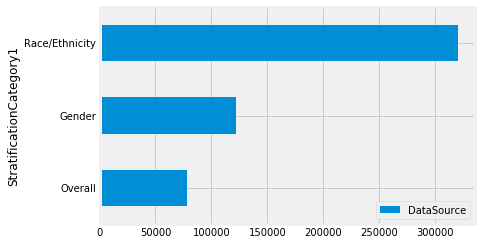

In [34]:
Chronic_Diseases.groupby("StratificationCategory1").count().sort_values("DataSource").plot(kind='barh', y='DataSource')

---

In [31]:
Chronic_Diseases.get("Stratification1").value_counts()

Overall                             77888
White, non-Hispanic                 64034
Black, non-Hispanic                 64034
Hispanic                            64034
Female                              60830
Male                                60830
Other, non-Hispanic                 46441
Multiracial, non-Hispanic           46441
American Indian or Alaska Native    17593
Asian or Pacific Islander           16851
Asian, non-Hispanic                   742
Name: Stratification1, dtype: int64

In [36]:
# Subset the dataset into different stratification categories
stratification_category_1 = Chronic_Diseases[Chronic_Diseases.get("StratificationCategory1") == 'Race/Ethnicity']
stratification_category_2 = Chronic_Diseases[Chronic_Diseases.get("StratificationCategory1") == 'Gender']
stratification_category_3 = Chronic_Diseases[Chronic_Diseases.get("StratificationCategory1") == 'Overall']

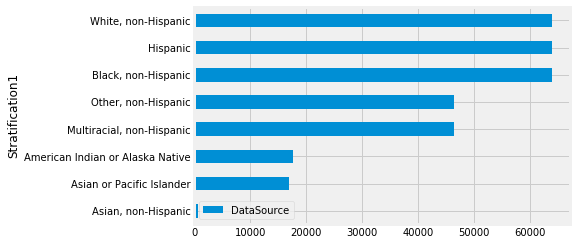

In [37]:
stratification_category_1.groupby("Stratification1").count().sort_values("DataSource").plot(kind='barh', y='DataSource')

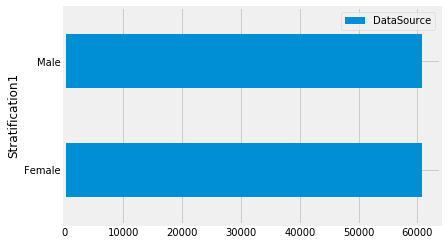

In [38]:
stratification_category_2.groupby("Stratification1").count().sort_values("DataSource").plot(kind='barh', y='DataSource')

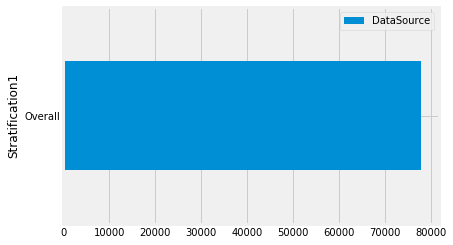

In [39]:
stratification_category_3.groupby("Stratification1").count().sort_values("DataSource").plot(kind='barh', y='DataSource')

### The surveys have participants of different ethnic groups, similar numbers of males and females

---

## EDA on Geolocations

In [41]:
Chronic_Diseases.get("GeoLocation").isna().sum()

3603

In [42]:
valid_geo = Chronic_Diseases[Chronic_Diseases.get("GeoLocation").notna()]
valid_geo

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,0.09,...,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_1,USD
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(18.220833, -66.590149)",72,ALC,ALC8_0_1,USD
5,2012,2012,VI,Virgin Islands,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(18.335765, -64.896335)",78,ALC,ALC8_0_1,USD
6,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_2,USD
7,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(18.220833, -66.590149)",72,ALC,ALC8_0_2,USD
9,2012,2012,VI,Virgin Islands,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(18.335765, -64.896335)",78,ALC,ALC8_0_2,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519711,2014,2014,TN,Tennessee,State Inpatient Data,Asthma,Hospitalizations for asthma,"cases per 10,000",Crude Rate,NaN,...,No data available,NaN,NaN,Gender,Female,"(35.68094058, -85.774490914)",47,AST,AST3_1,CRDRATE
519712,2016,2016,DC,District of Columbia,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,51.2,...,NaN,44.30,58.20,Gender,Female,"(38.907192, -77.036871)",11,CVD,CVD10_1,AGEADJPREV
